In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import difflib
import json
from tqdm import tqdm

import context
from cont_gen.utils import load_json, load_jsonl

In [2]:
# Check new para_merge data
merge_data = load_jsonl('../../data/cuad_clean/CUADv1_paras_merge_new.jsonl')
print(len(merge_data))

510


In [3]:
# Check the offset
for cont in merge_data:
    for para in cont['paras']:
        p_text = para['text']
        for qa in para['qas']:
            for ans in qa['answers']:
                a_t = ans['text']
                p_span = p_text[ans['start_pos']: ans['end_pos'] + 1]
                assert a_t == p_span


In [4]:
# Check paragraph length
# os.environ['']
from transformers import AutoModel, AutoTokenizer

/storage_fast/rhshui/lib/anaconda3/envs/llm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
tk_t5 = AutoTokenizer.from_pretrained('google/flan-t5-base')
tk_llama2 = AutoTokenizer.from_pretrained('meta-llama/Llama-2-7b-hf', cache_dir = '/next_share/hf_cache/hub')
tk_llama3 = AutoTokenizer.from_pretrained('meta-llama/Meta-Llama-3-8B', cache_dir = '/next_share/hf_cache/hub')
tk_mistral = AutoTokenizer.from_pretrained('mistralai/Mixtral-8x7B-v0.1', cache_dir = '/next_share/hf_cache/hub')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
def get_enc_len(text, tokenizer):
    return len(tokenizer.tokenize(text))
print(get_enc_len('Hello world!', tk_t5))

3


In [7]:
all_para_text = [para['text'] for cont in merge_data for para in cont['paras']]
all_para_len_t5 = [get_enc_len(t, tk_t5) for t in tqdm(all_para_text)]

100%|██████████| 31301/31301 [00:09<00:00, 3148.05it/s]


In [19]:
all_para_len_llama2 = [get_enc_len(t, tk_llama2) for t in tqdm(all_para_text)]

100%|██████████| 31301/31301 [00:11<00:00, 2627.66it/s]


In [20]:
all_para_len_llama3 = [get_enc_len(t, tk_llama3) for t in tqdm(all_para_text)]

100%|██████████| 31301/31301 [00:09<00:00, 3255.21it/s]


In [9]:
all_para_len_mistral = [get_enc_len(t, tk_mistral) for t in tqdm(all_para_text)]

100%|██████████| 31301/31301 [00:11<00:00, 2638.51it/s]


mean: 188.23063160921376, max: 2072, 95%: 627.0


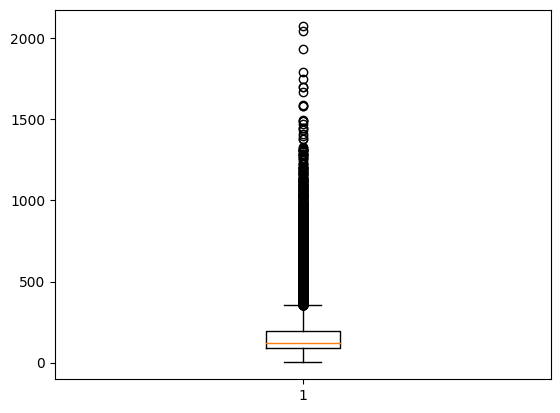

In [10]:
qunt_95 = np.quantile(all_para_len_t5, 0.95)
print(f'mean: {np.mean(all_para_len_t5)}, max: {np.max(all_para_len_t5)}, 95%: {qunt_95}')
_ = plt.boxplot(all_para_len_t5)

mean: 209.1827737132999, max: 3112, 95%: 695.0


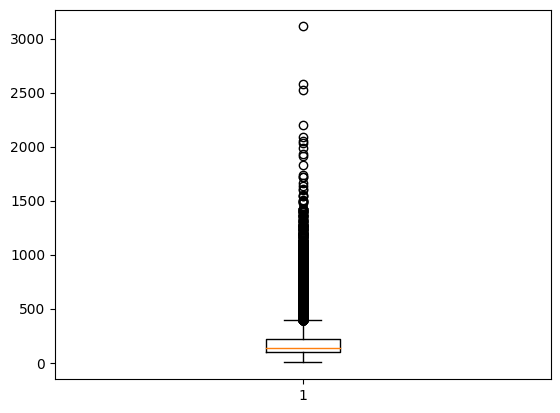

In [21]:
qunt_95 = np.quantile(all_para_len_llama2, 0.95)
print(f'mean: {np.mean(all_para_len_llama2)}, max: {np.max(all_para_len_llama2)}, 95%: {qunt_95}')
_ = plt.boxplot(all_para_len_llama2)

mean: 172.06479026229195, max: 1977, 95%: 577.0


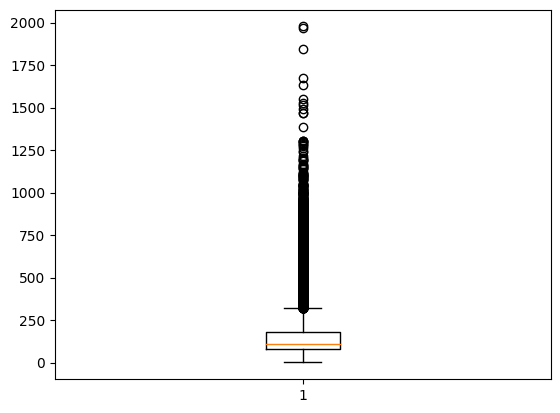

In [22]:
qunt_95 = np.quantile(all_para_len_llama3, 0.95)
print(f'mean: {np.mean(all_para_len_llama3)}, max: {np.max(all_para_len_llama3)}, 95%: {qunt_95}')
_ = plt.boxplot(all_para_len_llama3)

mean: 197.56461454905593, max: 3099, 95%: 656.0


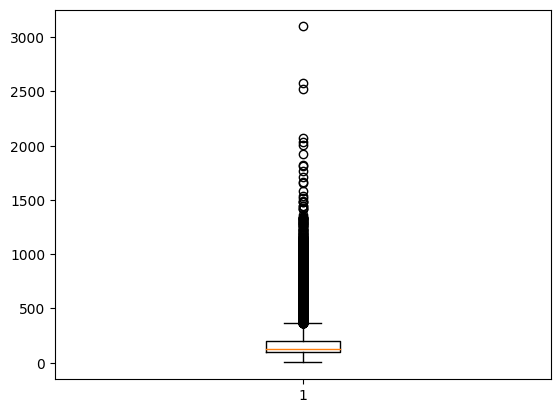

In [12]:
qunt_95 = np.quantile(all_para_len_mistral, 0.95)
print(f'mean: {np.mean(all_para_len_mistral)}, max: {np.max(all_para_len_mistral)}, 95%: {qunt_95}')
_ = plt.boxplot(all_para_len_mistral)

In [14]:
tk_t5lg = AutoTokenizer.from_pretrained('google/flan-t5-large', cache_dir = '/next_share/hf_cache/hub')

In [26]:
exa_text = 'I love panda. \n\n\n. Hello 111111 测试'
def back_trans(tokenizer, text):
    return tokenizer.decode(tokenizer.encode(text, add_special_tokens=False))
print(f't5: {repr(back_trans(tk_t5, exa_text))}')
print(f'llama2: {repr(back_trans(tk_llama2, exa_text))}')
print(f'mistral: {repr(back_trans(tk_mistral, exa_text))}')
print(f'llama3: {repr(back_trans(tk_llama3, exa_text))}')

t5: 'I love panda.. Hello 111111 <unk>'
llama2: 'I love panda. \n\n\n. Hello 111111 测试'
mistral: 'I love panda. \n\n\n. Hello 111111 测试'
llama3: 'I love panda. \n\n\n. Hello 111111 测试'


In [31]:
dec_str = tk_llama3.decode(tk_llama3.encode(exa_text, add_special_tokens=False)[:-1])
print(dec_str)
print(ord(dec_str[-1]))

I love panda. 


. Hello 111111 �
65533


In [38]:
from pathlib import Path
Path('a/name.txt').stem

'name'

In [36]:
os.getcwd()

'/storage_fast/rhshui/workspace/contract_review/scripts/jupyter'